# News topic exploration 

# Importing libraries

In [2]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
import csv

In [19]:
#import nltk
import string
import re
import sys
from wordcloud import WordCloud, STOPWORDS

# Reading the dataset

In [5]:
# read CSV file & load into list
with open("News_data.csv",'r') as my_file:
    reader = csv.reader(my_file, delimiter=',')
    news_data_train = list(reader) 

# Exploring the data 

In [6]:
print(news_data_train[3])

["Oil and Economy Cloud Stocks' Outlook (Reuters)", 'Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.']


# Cleaning and combining the text data 

In [8]:
stopwords_file = open("stopwords.txt", "r" , encoding="utf8") 
stopwords = stopwords_file.read()
#stopwords.split()

In [9]:
#stop = set(stopwords.words('english'))

In [10]:
STOPWORD_customized = {'will' ,'reuters','reuters' , 'monday','tuesday','wednesday','thursday','friday','saturday','sunday','yesterday'}

In [12]:
#label = [] # class
text_doc = [] # news text 
c =0 # to control count of 
for i in news_data_train:
    c= c+1
    if c < 10000 :
        #label.append(i[0])            
        merged = i[0]+i[1] # combining header and content 
        lowers = merged.lower()   # to lower      
        no_punctuation = re.sub(r'[^\w\s]',' ', lowers)    # remove punctuation
        temp = ' '.join(word for word in no_punctuation.split() if len(word)>3) # remove samll words
        filtered = ' '.join(word for word in temp.split() if word not in stopwords.split()) # remove stopwords
        filtered = ' '.join(word for word in filtered.split() if word not in STOPWORD_customized) # remove stopwords
        text_doc.append(filtered)

In [14]:
print(text_doc[3])

economy cloud stocks outlook soaring crude prices plus worries economy outlook earnings expected hang stock market week depth summer doldrums


In [15]:
#print(text_doc)
text = ""
for i in range (1,len(text_doc)):
    temp = (text_doc[i])
    text = text + temp

In [17]:
from collections import Counter
word_count = Counter()
word_count.update((word for word in text.split()))
#for word, count in word_count.most_common():
    #print(word, ":" ,count,"\n")      

# Wordcloud - frequency based

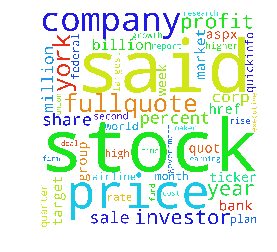

In [20]:
wordcloud = WordCloud(
    #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    #stopwords=STOPWORDS.union(stopword),
    background_color='white',
    #mask = logomask,
    max_words=50,
    width=4000,
    height=4000
).generate(text)

plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
#plt.savefig('./tweetcloud.png', dpi=300)
plt.show()

In [21]:
from collections import Counter
#Counter(label).keys() # equals to list(set(words))
#Counter(label).values() # counts the elements' frequency
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = text_doc  # processed text corpous 
X = vectorizer.fit_transform(corpus)
X.shape

(9999, 21119)

# Topic model

In [22]:
doc_complete = text_doc

In [23]:
STOPWORD_customized = {'will','new','york','will' ,'quot','year ','company ','week', 'one','two','three','reuters','reuters' , 'monday','tuesday','wednesday','thursday','friday','saturday','sunday','yesterday'}

In [24]:
doc_clean = []

In [25]:
num_topics=10 # number of topics required
num_words=10  # number of words in each topic
iter = 50 # Passes for LDA .. higher the better 

In [26]:
for i in range(0,len(doc_complete)):
    doc_clean.append(doc_complete[i].split())
#doc_clean

In [27]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\praveen\Anaconda3\envs\TCS\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [28]:
num_topics=30 # number of topics required
num_words=30  # number of words in each topic
iter = 100 # Passes for LDA .. higher the better

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=iter)

In [30]:
topics = ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

# topics

In [31]:
# lda is assumed to be the variable holding the LdaModel object
import matplotlib.pyplot as plt
for t in range(topics.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(topics.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

AttributeError: 'list' object has no attribute 'num_topics'